## Assignment 5 Logistic Regression

Data Analytics II 

Implement	logistic	regression	using	Python/R	to	perform	classification	on Social_Network_Ads.csv dataset. 

Compute Confusion matrix to find TP, FP, TN, FN, Accuracy, Error rate, Precision, 

Recall on the given dataset. 

### Importing Libraries

In [15]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline

### Loading Dataset

In [16]:
df = pd.read_csv("Social_Network_Ads.csv")

In [17]:
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [18]:
df.drop(['User ID'],axis=1,inplace=True)

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Gender           400 non-null    object
 1   Age              400 non-null    int64 
 2   EstimatedSalary  400 non-null    int64 
 3   Purchased        400 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 12.6+ KB


In [20]:
df.isnull().sum()

Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

In [21]:
# one hot encoding
df = pd.get_dummies(df,columns = (['Gender']), prefix = ['Gender'])

In [22]:
df.head()

,Age,EstimatedSalary,Purchased,Gender_Female,Gender_Male
0,19,19000,0,0,1
1,35,20000,0,0,1
2,26,43000,0,1,0
3,27,57000,0,1,0
4,19,76000,0,0,1


/home/karan/.local/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='EstimatedSalary', ylabel='Density'>

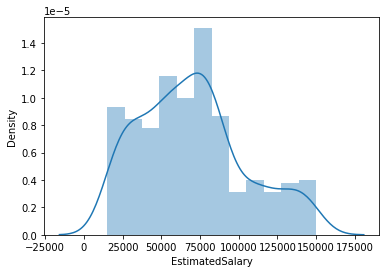

In [23]:
sns.distplot(df['EstimatedSalary'], kde=True)

In [26]:
X = df.drop(columns=['Purchased'])
Y = df.Purchased

In [27]:
from sklearn.model_selection import train_test_split

X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2,random_state=3,stratify=Y)

In [28]:
# Split the dataset 

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

## Scaling the data
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

In [29]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train,Y_train)

LogisticRegression()

In [30]:
y_train_predicted = model.predict(X_train)
y_test_predicted = model.predict(X_test)

Text(0.5, 15.0, 'Predicted label')

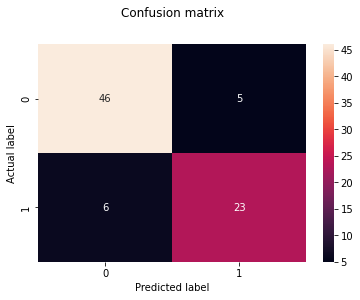

In [31]:
from sklearn import metrics

cnf_matrix = metrics.confusion_matrix(Y_test,y_test_predicted)

sns.heatmap(pd.DataFrame(cnf_matrix),annot=True)
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [32]:
print("Accuracy:",metrics.accuracy_score(Y_test, y_test_predicted))

Accuracy: 0.8625


In [33]:
cnf_matrix

array([[46,  5],
       [ 6, 23]])

In [34]:
tp = cnf_matrix[0][0]
fp = cnf_matrix[0][1]
fn = cnf_matrix[1][0]
tn = cnf_matrix[1][1]


print("\nTrue Positives : ",cnf_matrix[0][0])
print("\nFalse Positives : ",cnf_matrix[0][1])
print("\nFalse Negatives : ",cnf_matrix[1][0])
print("\nTrue Negatives : ",cnf_matrix[1][1])


print("\n Accuracy : ",metrics.accuracy_score(Y_test,y_test_predicted))

print()
from sklearn.metrics import classification_report
print(classification_report(Y_test, y_test_predicted))



True Positives :  46

False Positives :  5

False Negatives :  6

True Negatives :  23

 Accuracy :  0.8625

              precision    recall  f1-score   support

           0       0.88      0.90      0.89        51
           1       0.82      0.79      0.81        29

    accuracy                           0.86        80
   macro avg       0.85      0.85      0.85        80
weighted avg       0.86      0.86      0.86        80



In [38]:
import sklearn
help(sklearn.metrics.precision_score)

Help on function precision_score in module sklearn.metrics._classification:

precision_score(y_true, y_pred, *, labels=None, pos_label=1, average='binary', sample_weight=None, zero_division='warn')
    Compute the precision.
    
    The precision is the ratio ``tp / (tp + fp)`` where ``tp`` is the number of
    true positives and ``fp`` the number of false positives. The precision is
    intuitively the ability of the classifier not to label as positive a sample
    that is negative.
    
    The best value is 1 and the worst value is 0.
    
    Read more in the :ref:`User Guide <precision_recall_f_measure_metrics>`.
    
    Parameters
    ----------
    y_true : 1d array-like, or label indicator array / sparse matrix
        Ground truth (correct) target values.
    
    y_pred : 1d array-like, or label indicator array / sparse matrix
        Estimated targets as returned by a classifier.
    
    labels : array-like, default=None
        The set of labels to include when ``average